In [1]:
import tensorflow as tf

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.3)
N,D = x_train.shape

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(D,)),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=tf.keras.metrics.AUC())

In [11]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.4600 - auc: 0.8773 - val_loss: 0.4723 - val_auc: 0.8624
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4248 - auc: 0.9016 - val_loss: 0.4400 - val_auc: 0.8822
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3941 - auc: 0.9187 - val_loss: 0.4111 - val_auc: 0.9004
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3671 - auc: 0.9303 - val_loss: 0.3856 - val_auc: 0.9133
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3442 - auc: 0.9392 - val_loss: 0.3631 - val_auc: 0.9260
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3242 - auc: 0.9471 - val_loss: 0.3420 - val_auc: 0.9372
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3053 - auc: 0.9548 - val_loss: 0.3248 - val_auc: 0.9456
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2899 - 

13/13 [==============================] - 0s 2ms/step - loss: 0.1056 - auc: 0.9932 - val_loss: 0.1082 - val_auc: 0.9962
Epoch 64/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1049 - auc: 0.9933 - val_loss: 0.1074 - val_auc: 0.9962
Epoch 65/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1041 - auc: 0.9934 - val_loss: 0.1067 - val_auc: 0.9964
Epoch 66/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1034 - auc: 0.9935 - val_loss: 0.1058 - val_auc: 0.9965
Epoch 67/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1027 - auc: 0.9936 - val_loss: 0.1051 - val_auc: 0.9967
Epoch 68/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1021 - auc: 0.9936 - val_loss: 0.1044 - val_auc: 0.9968
Epoch 69/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1014 - auc: 0.9937 - val_loss: 0.1036 - val_auc: 0.9969
Epoch 70/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1007 - auc: 0

In [12]:
print('Train Score',model.evaluate(x_train,y_train))
print('Test Score',model.evaluate(x_test,y_test))

13/13 [==============================] - 0s 751us/step - loss: 0.0860 - auc: 0.9950
Train Score [0.08600889891386032, 0.9949581027030945]
6/6 [==============================] - 0s 801us/step - loss: 0.0871 - auc: 0.9974
Test Score [0.08707409352064133, 0.997402548789978]


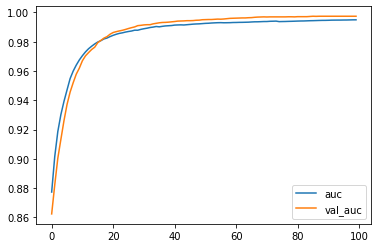

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['auc'],label='auc')
plt.plot(r.history['val_auc'],label='val_auc')
plt.legend()

In [14]:
P = model.predict(x_test)

6/6 [==============================] - 0s 801us/step


In [15]:
P

array([[9.70569253e-01],
       [5.30478656e-01],
       [9.93529081e-01],
       [9.98736143e-01],
       [9.94233847e-01],
       [1.81599376e-06],
       [9.90497530e-01],
       [9.65961218e-01],
       [9.83326018e-01],
       [9.87659097e-01],
       [9.98939693e-01],
       [9.93361294e-01],
       [9.95955467e-01],
       [4.68080398e-04],
       [5.66962183e-01],
       [9.97108281e-01],
       [2.08314268e-05],
       [1.69326551e-03],
       [9.93167937e-01],
       [9.36214507e-01],
       [1.20133394e-03],
       [4.88219812e-04],
       [9.97368455e-01],
       [9.98899639e-01],
       [9.99200046e-01],
       [9.70237076e-01],
       [7.98788108e-03],
       [6.28286004e-02],
       [9.94715214e-01],
       [9.99083638e-01],
       [9.95087564e-01],
       [9.84003663e-01],
       [9.47796524e-01],
       [9.91440237e-01],
       [9.81595993e-01],
       [3.57752759e-03],
       [9.48448181e-01],
       [9.70930636e-01],
       [7.97472179e-01],
       [9.40628648e-01],


In [16]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0.]


In [17]:
print("Manually Calculated Accuracy",np.mean(P==y_test))

Manually Calculated Accuracy 0.9766081871345029


In [18]:
print("Model Calculated Accuracy",model.evaluate(x_test,y_test))

6/6 [==============================] - 0s 1ms/step - loss: 0.0871 - auc: 0.9974
Model Calculated Accuracy [0.08707409352064133, 0.997402548789978]


#### Model Save & Load

In [21]:
model.save('G:\\git\\deeplearning\\models\\deep_learning_classification.h5')

In [22]:
model2 = tf.keras.models.load_model('G:\\git\\deeplearning\\models\\deep_learning_classification.h5')

In [23]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
